In [26]:
#libraries to load

import math
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
from plotly import tools
from IPython.display import display, HTML
import cufflinks as cf

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split

init_notebook_mode(connected=True)

# show/hide functionality from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
When viewing on Jupyter NBViewer, click the top right < / > button to show/hide code cells. When viewing in a locally hosted notebook, use buttons like this one.
<a href="javascript:code_toggle()">show/hide libraries imported</a>''')
display(tag)

[//]: # (Title)

<div align='center'><font size="6" color='#088a5a'>When is Spending \$\$\$ for MS in Data Science Worth it?</font></div>
<div align='center'><font size="4" color="#088a5a">An exploratory data analysis prompted by the '2019 Kaggle ML & DS Survey' 5th-place prize winner, 'Is Spending $$$ for MS in Data Science worth it ?'</font></div>
<hr>

[//]: # (Introduction and screengrab)

<p>
    &emsp;&emsp;&emsp;Hello, world! My name is Kyle Compton, and I like many others am answering the call of the 21st century gold rush: data science. Six months ago, after the global covid-19 pandemic turned my economic modeling/business development job into a glorified telemarketing gig, I decided to drop out of the labor market for a little while to redevelop the mathematical and statistical skills I'd worked so hard to develop during undergrad, and try my hand in the world of technology. I explored web development and programming through Harvard's CS50x course, where I ultimately built an app I use every day to support my workouts. After some reflection though I felt that didn't involve enough of the math and stats that I enjoyed practicing in undergrad, which inevitably led me to discover the combination of business skills, programming, and math/stats that I've been looking for: data science. Preliminary investigation led me to believe that if not an outright requirement there's at least a strong preference for data scientists to have advanced degrees, and so unless I hear back from one of my reach schools, I'll be taking courses towards an MS in Data Science online from Johns Hopkins University starting this spring.
</p>

<p>
    &emsp;&emsp;&emsp;This background is helpful to understand that I've now been looking for an interesting project with which I could begin building a data science portfolio, and when I happened upon a <a href="https://www.kaggle.com/shivamb/spending-for-ms-in-data-science-worth-it/">notebook from a Kaggle competition</a> drawing conclusions that went very immediately against my current learning plan, I knew I had my subject. The author was a Kaggle notebooks grandmaster, this notebook had won 5th prize in last year's '2019 Kaggle ML & DS Survey' competition, and the conclusions were effectively that one didn't need an MS to become a Data Scientist, and so I had to explore the data myself.
</p>
<img src='https://techandkyle.com/Kaggle_Notebook_Response_Screengrab.png' width=700>
<p>
    &emsp;&emsp;&emsp;If the conclusions in the notebook were right, then I could be on the verge of spending a whole lot of money and time for a formal education I might not need in order to improve my opportunity and expected future earnings. If I listened to the conclusions and they turned out to be falsely negative, however, I would have to wait another whole year for the grad school application process to resume while passing my time building skills informally. Having been curious which of these categories his conclusions fell under, and having been curious how far the skills I've been developing taking <a href="https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/">Jose Portilla's 'Python for Data Science and Machine Learning Bootcamp' on Udemy</a> could take me in investigating his claims myself, I present my own exploratory data analysis of this survey and elaborate on some of the conclusions drawn by the author.
</p>
<br>
<p>
    <b><font size=4>Spoiler alert: Spending $ for an MS in data science is not always worth it.</font></b>
</p>

[//]: # (table of contents)

<font color='#088a5a' size=6>Contents</font><br>
<br>
<font size=3>
<a style="text-decoration:none;" href="#1">1. Summarizing the author's arguments</a><br>
&nbsp; &nbsp; &nbsp; &nbsp; <a style="text-decoration:none;" href="#2">Data science degrees are the same bang for more buck</a><br>
&nbsp; &nbsp; &nbsp; &nbsp; <a style="text-decoration:none;" href="#3">Most data scientists didn't get a degree in data science</a><br>
&nbsp; &nbsp; &nbsp; &nbsp; <a style="text-decoration:none;" href="#4">Data science degrees don't yield greater compensation</a><br>
<a style="text-decoration:none;" href="#5">2. Where the author was right: advanced degrees don't earn data scientists higher compensation </a><br>
&nbsp; &nbsp; &nbsp; &nbsp; <a style="text-decoration:none;" href="#6">Compensation of data scientists by educational attainment</a><br>
&nbsp; &nbsp; &nbsp; &nbsp; <a style="text-decoration:none;" href="#7">The premium disappears when controlling for experience</a><br>
&nbsp; &nbsp; &nbsp; &nbsp; <a style="text-decoration:none;" href="#8">Examining potential outliers affecting average compensation by education/experience</a><br>
&nbsp; &nbsp; &nbsp; &nbsp; <a style="text-decoration:none;" href="#9">Confirmed: negative premium on an MS in data science</a><br>
<a style="text-decoration:none;" href="#10">3. Where the author was wrong: advanced degrees make data scientists competitive</a><br>
&nbsp; &nbsp; &nbsp; &nbsp; <a style="text-decoration:none;" href="#11">We can't assume the historic distribution of in-school data science education moving forward</a><br>
&nbsp; &nbsp; &nbsp; &nbsp; <a style="text-decoration:none;" href="#12">The actual educational attainment of data scientists</a><br>
&nbsp; &nbsp; &nbsp; &nbsp; <a style="text-decoration:none;" href="#13">Educational Credentials as a Means of Screening Candidates, with Exceptions</a><br>
<a style="text-decoration:none;" href="#14">4. Conclusions</a><br>
<a style="text-decoration:none;" href="#15">5. References</a>
</font>

[//]: # (Summarizing the Author's Arguments; Data science degrees are the same bang for more buck)

<div id="1"></div>
<font color='#088a5a' size=6>1. Summarizing the author's arguments</font><br>

<p>
    &emsp;&emsp;&emsp;Data science is one of the hottest roles in the 21st century, <a href="https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm">being rated the best job in the US for 3 straight years by Glassdoor </a>and offering the opportunity of a very lucrative salary for those that are able to get their foot in the door. On top of that, there's a severe shortage of data scientists in the labor market, making it a seller's market for anybody able to represent themselves successfully as a data scientist. <a href="https://searchbusinessanalytics.techtarget.com/feature/Demand-for-data-scientists-is-booming-and-will-increase">"Demand for data science skills is growing exponentially, according to job sites. The supply of skilled applicants, however, is growing at a slower pace,"</a> according to Brian Holak at TechTarget.
</p>
<p>
    &emsp;&emsp;&emsp;The question that the author, myself, the college admissions officers I'm hoping to wow, and most everybody else would naturally be interested in answering, then, is this: <b>"does one need to get that expensive higher education degree" </b>to get a job in data science? <b>"is it possible to get the same skills, same profile, or even better compensation without such degrees?"</b> The author's main conclusions are outlined in the sections that follow.
</p><br>

<div id="2"></div>
<font color='#088a5a' size=4><b>Data science degrees are the same bang for more buck</b></font>

<br>

<p>    
    &emsp;&emsp;&emsp;Conventional wisdom dictates that earning an advanced degree will build one's skills and provide one with access to higher paying opportunities. However, the author notes that these degrees can be expensive (as seen in Figure 1), they can be difficult to be accepted for, and they require a significant amount of time to complete (as seen in Figure 2). If the goal is exclusively to build skills and opportunity, he proposes that the lower-cost, shorter turn-around time online resources like those on Coursera, Udemy, etc. might be a better option.
</p>

In [9]:
# (Figures 1 and 2: Tuition Fee and Duration of University Degrees in Data Science)

# show/hide functionality from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">show/hide author's derivation of charts</a>''')
display(tag)

university_data = """CMU Tepper	67575	24
UC Berkeley	66150	20
Georgia Tech	9900	23
Illinois-Urbana	19200	17.5
South California	55886	24
Wisconsin	30600	17.5
Boston Metropolitan	34400	24
Johns Hopkins	53740	17.5
Pennsylvania State	29250	17.5
Northwestern SPS	53148	18
Rutgers	23136	24
UCD Dublin	7575	36
Texas A&M	65000	24
Arizona State	39622	15
Northeastern	34200	24
Ohio	35250	20
Rice	129000	24
Indiana Bloomington	15172	18
Notre Dame	48000	21
IIT Chicago	30985	16
Syracuse	54000	24
California Riverside	24990	13
Iowa State	24000	21
Oregon State	23445	17.5
Missouri	34000	24
CUNY SPS	13200	17.5
American	54186	15
Oklahoma	26103	14
Colorado	39450	24
Oklahoma State	33990	24
Baker College	17100	17.5
Bay Path	29340	24
Bellevue	20700	17.5
Blanchardstown	2320	24
Capella	33360	12
Central Connecticut	21681	17.5
Colorado Technical	28080	24
DePaul	43160	17.5
DS TechInstitute	7900	9
Dakota State	13320	10
Elmhurst College	25350	24
Full Sail	28008	12
La Salle	26250	20
Lewis	26235	24
Maryville St. Louis	22950	17.5
Phoenix	29316	17.5
Regis	25560	17.5
Saint Mary's College	31946	24
South Dakota State	13320	12
Saint Joseph's	17520	24
Southern Methodist	57084	28
Southern New Hampshire	22572	15
Slippery Rock	16269	10
Alabama Huntsville	21810	12
Maryland College	24984	17.5
Villanova	43400	24
West Virginia	30690	17.5
Northcentral	30530	23
Edinburgh Napier	9060	33
Drexel	56925	24
Merrimack College	28320	16
Varna Free	5391	12
Johnson & Wales	23744	24
Kent State	21524	12"""

university_data = university_data.split("\n")
udf = pd.DataFrame()
udf['name'] = [_.split("	")[0] for _ in university_data]
udf['tution'] = [float(_.split("	")[1]) for _ in university_data]
udf['months'] = [float(_.split("	")[2]) for _ in university_data]

udf1 = udf[udf['months'] > 6]
udf1 = udf1[udf1['months'] < 25]
udf1 = udf1[udf1['tution'] < 100000]
udf1['name1'] = udf1.apply(lambda x : "" if x['months'] in [9, 12, 17.5, 24] else x['name'], axis = 1)

fig = go.Figure([go.Bar(x=udf['name'], y=udf['tution'], orientation="v", name="Tution Fee", marker=dict(color="orange", opacity=0.5), ),
                 go.Scatter(x=udf['name'], name="Median Household Income", y=[59000]*len(udf), mode="lines", marker=dict(color="red"), line=dict(dash='dash')) ])
fig.update_layout(title="Figure 1. (From Author) Tution Fee : University Degrees in Data Science", plot_bgcolor='#fff', paper_bgcolor='#fff', legend=dict(orientation="h", x=0.1, y=1.1), 
                 xaxis = dict(tickangle = 45), height=450, width=900)
fig.show()

fig = go.Figure([go.Bar(x=udf['name'], y=udf['months'], orientation="v", marker=dict(color="#3498d5", opacity=0.5, line=dict(color="#3498d5")), name="Duration"),
                 go.Scatter(x=udf['name'], y=[12]*len(udf), mode="lines", marker=dict(color="red"), line=dict(dash='dash'), name="1 Yr"), 
                 go.Scatter(x=udf['name'], y=[18]*len(udf), mode="lines", marker=dict(color="blue"), line=dict(dash='dash'), name="1.5 Yr"), 
                 go.Scatter(x=udf['name'], y=[24]*len(udf), mode="lines", marker=dict(color="orange"), line=dict(dash='dash'), name="2 Yr"), 
                ])
fig.update_layout(title="Figure 2. (From Author) Duration : University Degrees in Data Science", plot_bgcolor='#fff', paper_bgcolor='#fff', legend=dict(orientation="h", x=0.1, y=1.1),
                   xaxis = dict(tickangle = 45), height=450, width=900)
fig.show()

<p>
    &emsp;&emsp;&emsp;The author concludes that <b>"if someone wants to work as a data scientist (fresher or career change)...then it may or may not be worth it"</b> to get a degree and <b>"if someone wants to earn more, then it is not necessary to have university degree, </b>as one with good experience or good skills can grab very high compensation packages." He bases these conclusions off his findings that:
    <ul>
        <li>Most data scientists didn't get a degree in data science</li>
        <li>Data science degrees don't usually lead to greater compensation</li>
    </ul>
</p>

<p>
    &emsp;&emsp;&emsp;Now, going into this I thought that I was going to prove this Kaggle grandmaster wrong (and make a lot of college admissions counselors happy in the process), but while the approach he used to test his hypothesis was flawed, <i>one</i> of his two findings still held true under my alternative approach. <b>In order to test whether it was worth going to school to learn data science, the author compared the outcomes of those that learned data science in school and those that didn't.</b> You can see this in the cell below copied from his analysis, where he differentiates between those that selected (potentially among other responses) 'University courses (resulting in a university degree)' when asked ''on which platforms have you begun or completed data science courses? Select all that apply' on the 2019 Kaggle ML & DS Survey.
</p>

In [4]:
df = pd.read_csv("multiple_choice_responses.csv", low_memory = False)
df = df[~df['Q5'].isin(["Student", "Not employed"])]
#note that the author removed from his analysis those that indicated that they were either students or unemployed

key1 = "University Courses (resulting in a university degree)"
df1 = df[df['Q13_Part_10'] == key1]
df2 = df[df['Q13_Part_10'] != key1]
#df1 and df2 are used throughout the remainder of the author's analysis to segment those with degrees and those without

<p>
    &emsp;&emsp;&emsp;Without a question on the field of study of those that earned degrees, this <i>is</i> the most reasonable way to identify those that went to school to become data scientists. However, this approach overlooks the fact that since data science is so new, data scientists that were in school more than a few years ago likely didn't have access to data science curriculum, but rather, earned advanced degrees in related fields then transitioned in as data science grew in popularity. <b>As a result, the outcomes of older (and likely more experienced) respondents were used to argue that one did not need to go to school to become a data scientist, which I thought overlooked the fact that one still does need an advanced degree to become a data scientist.</b> One can see how this delineation can lead to a distorted view of the distribution of educational attainment among data scientists from the author's Figure 3, and how this lead to similar distributions of compensation between the two groups in the author's Figure 4.
</p>

<div id="3"></div>

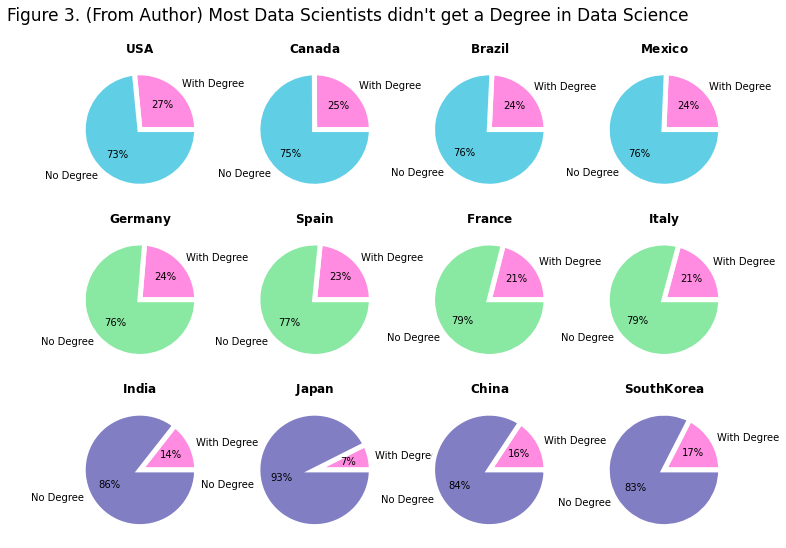

In [10]:
# (viz: most data scientists didn't get a degree in data science)

# show/hide functionality from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">show/hide author's derivation of charts</a>''')
display(tag)

nations = ["United States of America", "Canada", "Brazil", "Mexico", 
           "Germany", "Spain", "France", "Italy", 
           "India", "Japan", "China", "South Korea"]
nation_map = {"United States of America" : "USA", "United Kingdom of Great Britain and Northern Ireland" : "UK"}
plt.figure(figsize=(12,12))
plt.suptitle("Figure 3. (From Author) Most Data Scientists didn't get a Degree in Data Science", x=0.45, y=.94, fontsize=17)
vals = []
for j in range(len(nations)):
    country = nations[j]
    country_df = df[df['Q3'] == country]
    ddf1 = country_df[country_df['Q13_Part_10'] == key1]
    ddf2 = country_df[country_df['Q13_Part_10'] != key1]
    plt.subplot(4, 4, j+1)
    
    if j < 4:
        colors = ["#ff8ce0", "#60cfe6"]
    elif j < 8:
        colors = ["#ff8ce0", "#89e8a2"]
    else:
        colors = ["#ff8ce0", "#827ec4"]
    
    vals.append(len(ddf1) / (len(ddf1) + len(ddf2)))    
    plt.pie([len(ddf1), len(ddf2)],
            labels=["With Degree", "No Degree"],
            autopct="%1.0f%%", 
            colors=colors,
            wedgeprops={"linewidth":5,"edgecolor":"white"})
    if country in nation_map:
        country = nation_map[country]
    plt.title(r"$\bf{" + country + "}$")

[//]: # (Discussion of 'Most Data Scientists didn't get a Degree in Data Science)

<p>
    &emsp;&emsp;&emsp;As you can see, the share of data scientists <i>that learned data science through university</i> varies from 7% in Japan to over 25%, and is as high as 40% in Tunisia, Austria, New Zealand, and Greece (all not shown). In the United States, which I focus my analysis on, 27% of data scientists have learned data science through university courses. Using these statistics, <b>the author argues that since most data scientists didn't go to school to learn data science, people shouldn't go to school in order to become data scientists.</b>
</p>

<div id="4"></div>

In [12]:
# (viz: data science degrees don't yield greater compensation)

# show/hide functionality from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">show/hide author's derivation of charts</a>''')
display(tag)

col_yes = "#fad46b"
col_no = "#97c6e8"

def compute_stats(df, col, xaxis=None):
    agg_df = df[col].value_counts().to_frame()
    total = sum(agg_df[col])
    agg_df['percent'] = agg_df[col].apply(lambda x : 100*x / total)
    agg_df = agg_df.reset_index().rename(columns = {col: "count", 'index' : col})
    agg_doc = {}
    if xaxis != None:
        for _ in xaxis:
            try:
                agg_doc[_] = agg_df[agg_df[col] == _]['percent'].iloc(0)[0]
            except:
                agg_doc[_] = 0
    return agg_doc

def plot_ver_bars(c, ht=500, annot = True):
    dxf1 = df1[df1['Q5'].isin(["Data Scientist"])]
    dxf2 = df2[df2['Q5'].isin(["Data Scientist"])]

    count_df1 = dxf1[dxf1["Q3"].isin([c])]
    count_df2 = dxf2[dxf2["Q3"].isin([c])]
    col = "Q10"
    xaxis = ["$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999", "5,000-7,499", "7,500-9,999", "10,000-14,999", "15,000-19,999", "20,000-24,999", "25,000-29,999", "30,000-39,999", "40,000-49,999", "50,000-59,999", "60,000-69,999", "70,000-79,999", "80,000-89,999", "90,000-99,999", "100,000-124,999", "125,000-149,999", "150,000-199,999", "200,000-249,999", "250,000-299,999", "300,000-500,000", "> $500,000"]
    t1_doc = compute_stats(count_df1, col, xaxis=xaxis)
    t2_doc = compute_stats(count_df2, col, xaxis=xaxis)

    ## plot the bar chart
    xaxis1 = ["$0K", "1 - 1K", "2 - 2K", "3 - 3K", "4 - 4K", "5 - 7.5K", "7.5 - 10K", "10 - 15K", "15 - 20K", "20 - 25K", "25 - 30K", "30 - 40K", "40 - 50K", "50 - 60K", "60 - 70K", "70 - 80K", "80 - 90K", "90 - 100K", "100 - 125K", "125 - 150K", "150 - 200K", "200 - 250K", "250 - 300K", "300 - 500K", "> $500K"]
    fig = go.Figure(data=[
                go.Bar(name='Without University Degree', x=xaxis1[7:], y=[t2_doc[_] for _ in xaxis][7:], marker=dict(color=col_no, opacity=0.8)),
                go.Bar(name='With University Degree', x=xaxis1[7:], y=[t1_doc[_] for _ in xaxis][7:], marker=dict(color=col_yes, opacity=0.8))])
    fig.update_layout(barmode='group', title="Figure 4. (From Author) Data Science Degrees don't Yield Greater Compensation", 
                      yaxis = dict(title="% of respondents"), xaxis = dict(title="US$"), height=450, width=900,
                      legend=dict(orientation="h", x=0.01, y=1.1), plot_bgcolor='#fff', paper_bgcolor='#fff')
                                 
    fig.update_xaxes(showgrid=False, zeroline=False)
    fig.update_yaxes(showgrid=False, zeroline=False)
    if annot == True:
        fig.update_layout(annotations=[go.layout.Annotation(x=15.5, y=13, xref="x", yref="y", 
                                                       text="More % of Individuals <br> Without University Degrees <br>Earning > $150K", 
                                                       showarrow=True, arrowhead=7, ax=0, ay=-40), 
                                 go.layout.Annotation(x=11, y=24, xref="x", yref="y", 
                                                       text="With University Degrees <br> Earning More", 
                                                       showarrow=True, arrowhead=7, ax=0, ay=-40)])
        fig.add_shape(go.layout.Shape(
                    type="rect",
                    xref="x",
                    yref="paper",
                    x0=12.5,
                    x1=17.5,
                    y0=0.03,
                    y1=1,
                    fillcolor="red",
                    opacity=0.1,
                    layer="below",
                    line_width=0))
        fig.add_shape(go.layout.Shape(
                    type="rect",
                    xref="x",
                    yref="paper",
                    x0=10.5,
                    x1=12.4,
                    y0=0.5,
                    y1=1,
                    fillcolor="green",
                    opacity=0.1,
                    layer="below",
                    line_width=0))
    
    
    fig.show()
    return count_df1, count_df2

nations = ["United States of America", "Germany"]
c1, c2 = plot_ver_bars(nations[0])

[//]: # (Discussion of 'Data Science Degrees don't Yield Greater Compensation)

<p>
&emsp;&emsp;&emsp;The author then goes on to argue based on the chart above that <b>"looking at every bucket, it is clear that there are no significant differences (in terms of compensation) between the two groups."</b> He finds it "very interesting to note that there are more percentage of respondents without university degrees than those who have who are earning in the range of USD 150K- 300K. This area is highlighted in red." Bear in mind that, as we'll see in my analysis, individuals in the blue category tend to be older (and further in their careers) and so one should not conclude based on this chart that people earn the same compensation regardless of whether or not they go to school to learn data science.
</p>

[//]: # (2. Where the Author was Right: Advanced Degrees don't earn Data Scientists Higher Compensation)

<div id="5"></div>
<font color='#088a5a' size=6>2. Where the Author was Right: Advanced Degrees don't earn Data Scientists Higher Compensation</font><br>

[//]: # (body introducing where the author was right)

<p>
    &emsp;&emsp;&emsp;Yes, you read that correctly. The person that's about to spend ~\$50k on an MS in data science is telling you that an advanced degree in data science won't earn you more money than your data scientist counterparts with mere bachelor's degrees. This flies in the face of reason, veteran economists, the admissions counselors for the reach schools that I'd like to flatter, and everybody in between. In 2013, the wage premium on a master's degree over a bachelor's was $12,000 <a href="https://www.bls.gov/careeroutlook/2015/article/should-i-get-a-masters-degree.htm">according to the US Bureau of Labor Statistics.</a> The BLS notes, however, that "in some occupations, workers with a master's degree earned about the same as, or even less than, those with a bachelor's degree." They point to this happening in professions that don't often require advanced degrees, though, so this is an interesting dynamic. And at first glance at Figure 5, it's not a dynamic one would even notice.
</p>

<div id="6"></div>

In [13]:
# (viz: compensation by educational attainment)

# show/hide functionality from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">show/hide my derivation of charts</a>''')
display(tag)

mydf = pd.read_csv("multiple_choice_responses.csv", low_memory = False)
American_DS = mydf[(mydf['Q3']=='United States of America') & (mydf['Q5']=='Data Scientist')]

#comp_calculator is used to calculate avg. compensation by educational attainment by being mapped to each item in educ_list.
def comp_calculator(x):
    comp_counter = 0
    counter = 0
    for row in American_DS.itertuples():           #it starts by iterating through each row of American_DS
        if row[6] == x:                            #checking if that row belongs to the educational category of interest
            if not isinstance(row[21], float):     #checking if that row has a value
                y=row[21].split("-")               #and then transforming that row's string for compensation into an integer
                if len(y) == 2:                    #the mid-point is assumed for any compensation given as a range
                    if y[0][0] == '$':
                        y[0] = y[0][1]
                    comp = ((int(y[0].replace(",","")) + int(y[1].replace(",",""))) / 2)
                    comp_counter += comp
                    counter += 1
                if len(y) == 1:                    #and for individuals earning >500k, 500k is assumed absent more detailed information
                    y = y[0][3:].replace(",","")
                    comp = int(y)
                    comp_counter += comp
                    counter += 1
        #note - these six rows commented out were for finding the compensation of each individual with some college, then calculating what the average would have been if not for the two highest earning individuals
        #if ((x == 'Some college/university study without earning a bachelor’s degree') & (row[6] == x)):
            #print(row[21])
    #if x == 'Some college/university study without earning a bachelor’s degree':
        #print(comp_counter - 800000)
        #print(counter - 2)
        #print(1129996 / 8)
    return (comp_counter / counter)

colors = ['#FF97CD', '#6EE9FF', '#0BDAFF', '#00C0E1', '#C12173']
educ_list = ["Some college/university study without earning a bachelor’s degree", "Bachelor’s degree", "Master’s degree", "Doctoral degree", "Professional degree"]

comp_by_educ = pd.Series(list(map(comp_calculator, educ_list)))

fig = go.Figure(data=[
    go.Bar(name='Educational Attainment', 
           x=["Some college", "Bachelor’s degree", "Master’s degree", "Doctoral degree", "Professional degree"],
           y=comp_by_educ,
           marker = dict(color=colors, opacity=1))
    ])
fig.update_layout(
    title="Figure 5. Compensation of Data Scientists by Educational Attainment",
    xaxis=dict(title="Highest Level of Education Completed"),
    yaxis=dict(title="Annual Compensation ($USD)"),
    plot_bgcolor='#fff',
    height = 450,
    width=900
)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

[//]: # (body discussing compensation by educational attainment)

<p>
    &emsp;&emsp;&emsp;As you can see in Figure 5, the <b>difference in average compensation between those with Bachelor's and Master's degrees, </b>while not huge, <b>is roughly $1,200 per year,</b> and <b>the premium when you jump up to a Ph.D. is \$26.2k.</b> This would seem to contradict my claim that advanced degrees do not yield a wage premium, but note that these averages do not account for the average years of experience among the members of each category of educational attainment. </p>

<p>
    &emsp;&emsp;&emsp;Also note the high average compensation for those with some college but didn't finish their degree - those that are subject to what I'm referring to as the 'Jobs effect'. It's worth noting that there's only 10 observations in that category out of 706 total, and so that average is much more subject than the others to being skewed by outliers (like the two individuals that alone bring the average up from \$141k). These individuals may very well be those that dropped out of school to start their own company, but the rest of us shouldn't draw conclusions about becoming a data scientist based off the experience of a very limited number of entrepreneurs. (Note: as such, 'some college' is withheld from the remaining visualizations)
</p>

<p>
    &emsp;&emsp;&emsp;That being said, note the difference in compensation between those with a Bachelor's degree and either a Master's or a Doctoral Degree when controlling for experience in Figure 6. (Note: hiding the professional degree or other lines by clicking on their legend marker may improve the figure's readability)
</p>

<div id="7"></div>

In [17]:
# (viz: The premium disappears when controlling for experience)

# show/hide functionality from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">show/hide my derivation of charts</a>''')
display(tag)

experience_list = ['< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']

Some_College_List = []
Bachelors_List = []
Masters_List = []
Doctoral_List = []
Professional_List = []

def comp_by_age_calculator(x):                       #comp_by_age_calculator is a similar cumulative sum collector as the functions above,
    Some_College_Counter = 0                         #expect because there's a third dimension introduced it collects compensation for each
    Bachelors_Counter = 0                            #education category as it iterates through American_DS, and then for each experience
    Masters_Counter = 0                              #category it's mapped to it appends the avg. comp for each educ category to a final list
    Doctoral_Counter = 0                             #(above). 
    Professional_Counter = 0
    Some_College_Comp_Counter = 0
    Bachelors_Comp_Counter = 0
    Masters_Comp_Counter = 0
    Doctoral_Comp_Counter = 0
    Professional_Comp_Counter = 0
    
    for row in American_DS.itertuples():
        comp = 0
        if row[56] ==x:
            if not isinstance(row[21], float):
                y=row[21].split("-")
                if len(y) == 2:
                    if y[0][0] == '$':
                        y[0] = y[0][1]
                    comp = ((int(y[0].replace(",","")) + int(y[1].replace(",",""))) / 2)
                if len(y) == 1:
                    y = y[0][3:].replace(",","")
                    comp = int(y)
            if row[6] == 'Some college/university study without earning a bachelor’s degree':  
                Some_College_Counter += 1                                    #comp is calculated and then added to the appropriate
                Some_College_Comp_Counter += comp                            #counter based on each row's educational attainment
            elif row[6] == 'Bachelor’s degree':
                Bachelors_Counter += 1
                Bachelors_Comp_Counter += comp
            elif row[6] == 'Master’s degree':
                Masters_Counter += 1
                Masters_Comp_Counter += comp
            elif row[6] == 'Doctoral degree':
                Doctoral_Counter += 1
                Doctoral_Comp_Counter += comp
            elif row[6] == 'Professional degree':
                Professional_Counter += 1
                Professional_Comp_Counter += comp
    if Some_College_Counter != 0:                                           #not all educational categories have observations
        Some_College_List.append(Some_College_Comp_Counter / Some_College_Counter)   #for each level of experience, in which
    else:                                                                   #case 'None' is appended to the list to be fed to
        Some_College_List.append(None)                                      #the graphing object so the list retains the same
    if Bachelors_Counter != 0:                                              #length
        Bachelors_List.append(Bachelors_Comp_Counter / Bachelors_Counter)
    else:
        Bachelors_List.append(None)    
    if Masters_Counter != 0:
        Masters_List.append(Masters_Comp_Counter / Masters_Counter)
    else:
        Masters_List.append(None)
    if Doctoral_Counter != 0:
        Doctoral_List.append(Doctoral_Comp_Counter / Doctoral_Counter)
    else:
        Doctoral_List.append(None)
    if Professional_Counter != 0:
        Professional_List.append(Professional_Comp_Counter / Professional_Counter)
    else:
        Professional_List.append(None)
    
    return None

comp_by_educ_by_age = list(map(comp_by_age_calculator, experience_list))

###this section commented out was for calculating the premiums discussed in the section below.
#x = 0
#for i in range(5):
    #x += (Bachelors_List[i] - Doctoral_List[i])
#print(x / 5)

#y = 0
#for i in range(6):
    #y += (Bachelors_List[i] - Masters_List[i])
#print(y / 6)

#z = 0
#for i in range(1,3):
    #z += (Bachelors_List[i] - Professional_List[i])
#print(z / 2)
#############

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=experience_list,
    y=Bachelors_List,
    name="Bachelor's degree",
    mode='lines',
    line=dict(color='#6EE9FF', width=3, dash='dot')
))
fig.add_trace(go.Scatter(
    x=experience_list,
    y=Masters_List,
    name="Master's degree",
    mode='lines',
    line=dict(color='#0BDAFF', width=3, dash='dash')
))
fig.add_trace(go.Scatter(
    x=experience_list,
    y=Doctoral_List,
    name="Doctoral Degree",
    mode='lines',
    line=dict(color='#00C0E1', width=3, dash='dashdot')
))
fig.add_trace(go.Scatter(
    x=experience_list,
    y=Professional_List,
    name="Professional Degree",
    mode='lines',
    line=dict(color='#C12173', width=3)
))

fig.update_layout(title='Figure 6. The Premium Disappears when Controlling for Experience',
                 yaxis=dict(title='Annual Compensation ($USD)'),
                 xaxis=dict(title='Years Coding Experience'),
                 height=450,
                 width=900,
                 legend=dict(orientation='h', x=0.5, y=0.2),
                 plot_bgcolor='#fff')

[//]: # (body discussing 'the premium disappears when controlling for experience)

<p>
    &emsp;&emsp;&emsp;Before looking at the negative premium on Master's degrees, it's worth noting that <b><font size=4>there is a \$2,022 premium on a Doctoral degree over a Bachelor's degree,</font></b> but this is due almost entirely to the large differences between Doctoral and Bachelor's degree holders with 1-2 years of experience and 20+ years of experience. So from this one could conjecture that in the initial transition into data science a Doctoral Degree will provide early acccess to higher paying opportunities, but that premium quickly goes away as experience becomes the predominant factor in a data scientist's success. It then appears that the average compensation for veteran coders drops off after 20+ years of experience, and the largest drop is for those with Bachelor's indicating there may be some ceiling on more senior level jobs for those without advanced degrees. 
</p>

<p>
    &emsp;&emsp;&emsp;What's even better news is that <b><font size=4>there is a \$74,400 premium on Professional Degrees compared to Bachelor's</font></b> for data scientists with 1-5 years of experience. Now, it's again worth noting that there are only 10 individuals with Professional degrees in this sample, and so the categorical averages are once again subject to being skewed by outliers. Without any established Professional degrees in the formal data science discipline, however, one might assume these are individuals transitioning into data science from senior positions in related fields (like professional engineers or PE's, for example),which might suggest that data science would be a lucrative vertical to transition into for individuals with professional backgrounds.
</p>

<p>
    &emsp;&emsp;&emsp;Finally, for those with less than 20+ years of experience, <b><font size=4>data scientists with Bachelor's degrees make on average \$6,030 more than those with Master's degrees and the same amount of experience.</font></b> It's hard to say why this might be the case. Perhaps those with Bachelor's degrees have to work harder to get their foot in the door, and so they come into their jobs with better portfolios. Perhaps they are less likely to get stuck in purely technical roles, and have a higher likelihood of moving upward into higher-paying managerial roles with the same amount of experience. This finding came as a surprise though, so I created the swarm plot in Figure 7 to see if there were any outliers in either category that might be skewing the categorical averages. See below.
</p>

<div id="8"></div>

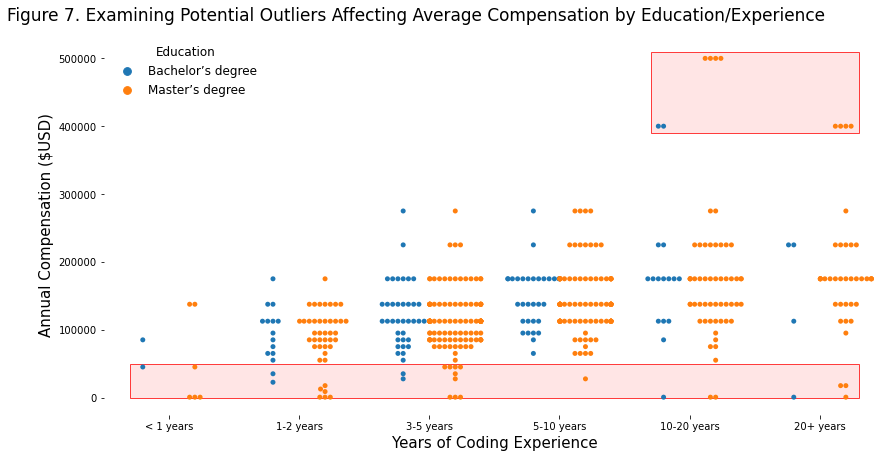

In [16]:
# (viz. Examining Potential Outliers Affecting Average Compensation by Education/Experience)

# show/hide functionality from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">show/hide my derivation of charts</a>''')
display(tag)

def calc_comp(row):                                 #calc_comp here is a simplified version of calc_comp in figure 6 since it only needs to return comp for each row, rather than iterate through all rows
    if not isinstance(row[21], float):
        y=row[20].split("-")
        if len(y) == 2:
            if y[0][0] == '$':
                y[0] = y[0][1]
            comp = ((int(y[0].replace(",","")) + int(y[1].replace(",",""))) / 2)
        if len(y) == 1:
            y = y[0][3:].replace(",","")
            comp = int(y)
    try:
        return comp
    except:
        return None

American_DS['comp'] = American_DS.apply(lambda row: calc_comp(row), axis=1)      #here a lambda function is used to generate a new comp column for each row by performing calc_comp on that row

fig = plt.figure(figsize=(14,7))
plt.box(on=None)

rectangle1 = plt.Rectangle((-.3,0), 5.6, 50000, fc=(1,0,0,0.1), ec=(1,0,0,.75))
plt.gca().add_patch(rectangle1)

rectangle2 = plt.Rectangle((3.7,390000), 1.6, 120000, fc=(1,0,0,0.1), ec=(1,0,0,.75))
plt.gca().add_patch(rectangle2)

plot = sns.swarmplot(x="Q15", 
              y="comp", 
              data = American_DS[American_DS['Q4'].isin(['Bachelor’s degree', 'Master’s degree'])], 
              split=True, 
              hue='Q4', 
              order=['< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years'],
             )
plot.set_title("Figure 7. Examining Potential Outliers Affecting Average Compensation by Education/Experience", x=.4, y=1.02, size=17)
plt.legend(title="Education", frameon=False, fontsize=12).get_title().set_fontsize('12')
plot.set_xlabel("Years of Coding Experience", fontsize=15)
plot.set_ylabel("Annual Compensation ($USD)", fontsize=15);

[//]: # (body discussing 'examining potential outliers affecting average compensation by education/experience')

<p>
    &emsp;&emsp;&emsp;Figure 7 highlights two useful pieces of information that might explain the dynamics illustrated in Figure 6.
</p>
<p>
    &emsp;&emsp;&emsp;First, <b>there are a handful of extremely high earners</b> (those in the 300k-500k and 500k+ categories) in the top right shaded box <b>whose compensation is very far removed from the rest of the sample.</b> One could assume that those earning above \$300k annually are doing something other than just working as a staff data scientist, like running their own company or earning investment income. If we want to focus just on staff data scientists, we can exclude these individuals from our calculations.
</p>

<p>
    &emsp;&emsp;&emsp;Second, <b>there are a number of individuals earning well below what one would expect of a full-time data scientist,</b> those in the bottom shaded box in Figure 7, <b>whose compensation may be pulling down the average compensation of their category.</b> These may be interns, retirees, individuals working part-time, or something else. It's hard to make an objective guess as to what floor on compensation would exclude individuals in these categories without excluding actual full-time data scientists, but for simplicity sake, I exclude any individual earning below \$50k annually to see if the patterns in Figure 6 hold true in Figure 8 below.
</p>

<div id="9"></div>

In [18]:
# (viz: confirmed: negative premium on MS in data science)

# show/hide functionality from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">show/hide my derivation of charts</a>''')
display(tag)

experience_list = ['< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']

Some_College_List = []
Bachelors_List = []
Masters_List = []
Doctoral_List = []
Professional_List = []

def comp_by_age_calculator(x):
    Some_College_Counter = 0
    Bachelors_Counter = 0
    Masters_Counter = 0
    Doctoral_Counter = 0
    Professional_Counter = 0
    Some_College_Comp_Counter = 0
    Bachelors_Comp_Counter = 0
    Masters_Comp_Counter = 0
    Doctoral_Comp_Counter = 0
    Professional_Comp_Counter = 0
    
    for row in American_DS.itertuples():   #this is the exact same function as before, except now a test is placed on each row
        comp = 0                           #to exclude outliers below 50k or above 300k
        if row[56] ==x:
            if not (row[21] in ['$0-999', '2,000-2,999', '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999', 
                                '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '300,000-500,000', '> $500,000']):
                if not isinstance(row[21], float):
                    y=row[21].split("-")
                    if len(y) == 2:
                        if y[0][0] == '$':
                            y[0] = y[0][1]
                        comp = ((int(y[0].replace(",","")) + int(y[1].replace(",",""))) / 2)
                    if len(y) == 1:
                        y = y[0][3:].replace(",","")
                        comp = int(y)
                if row[6] == 'Some college/university study without earning a bachelor’s degree':
                    Some_College_Counter += 1
                    Some_College_Comp_Counter += comp
                elif row[6] == 'Bachelor’s degree':
                    Bachelors_Counter += 1
                    Bachelors_Comp_Counter += comp
                elif row[6] == 'Master’s degree':
                    Masters_Counter += 1
                    Masters_Comp_Counter += comp
                elif row[6] == 'Doctoral degree':
                    Doctoral_Counter += 1
                    Doctoral_Comp_Counter += comp
                elif row[6] == 'Professional degree':
                    Professional_Counter += 1
                    Professional_Comp_Counter += comp
    if Some_College_Counter != 0:
        Some_College_List.append(Some_College_Comp_Counter / Some_College_Counter)
    else:
        Some_College_List.append(None)
    if Bachelors_Counter != 0:
        Bachelors_List.append(Bachelors_Comp_Counter / Bachelors_Counter)
    else:
        Bachelors_List.append(None)    
    if Masters_Counter != 0:
        Masters_List.append(Masters_Comp_Counter / Masters_Counter)
    else:
        Masters_List.append(None)
    if Doctoral_Counter != 0:
        Doctoral_List.append(Doctoral_Comp_Counter / Doctoral_Counter)
    else:
        Doctoral_List.append(None)
    if Professional_Counter != 0:
        Professional_List.append(Professional_Comp_Counter / Professional_Counter)
    else:
        Professional_List.append(None)
    return None

comp_by_educ_by_age = list(map(comp_by_age_calculator, experience_list))

###this section commented out was for calculating the premiums discussed in the section below.
#x = 0
#for i in range(5):
    #x += (Bachelors_List[i] - Doctoral_List[i])
#print(x / 5)

#y = 0
#for i in range(1,5):
    #y += (Bachelors_List[i] - Masters_List[i])
#print(y / 4)

#z = 0
#for i in range(1,5):
    #z += (Bachelors_List[i] - Professional_List[i])
#print(z / 4)
#############

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=experience_list,
    y=Bachelors_List,
    name="Bachelor's degree",
    mode='lines',
    line=dict(color='#6EE9FF', width=3, dash='dot')
))
fig.add_trace(go.Scatter(
    x=experience_list,
    y=Masters_List,
    name="Master's degree",
    mode='lines',
    line=dict(color='#0BDAFF', width=3, dash='dash')
))
fig.add_trace(go.Scatter(
    x=experience_list,
    y=Doctoral_List,
    name="Doctoral Degree",
    mode='lines',
    line=dict(color='#00C0E1', width=3, dash='dashdot')
))
fig.add_trace(go.Scatter(
    x=experience_list,
    y=Professional_List,
    name="Professional Degree",
    mode='lines',
    line=dict(color='#C12173', width=3)
))

fig.update_layout(title='Figure 8. Confirmed: Negative Premium on MS in Data Science',
                 yaxis=dict(title='Annual Compensation ($USD)'),
                 xaxis=dict(title='Years Coding Experience'),
                 height=450,
                 width=900,
                 legend=dict(orientation='h', x=0.5, y=0.2),
                 plot_bgcolor='#fff')

[//]: # (body discussing the premiums on advanced degrees after excluding outliers)

<p>
    &emsp;&emsp;&emsp;Re-examining the premium on the Doctoral degree over the Bachelor's degree first, we see that <b>the large difference in compensation in the 1-2 years category persists</b> when excluding outliers, confirming that <b>in the initial transition into data science a Doctoral degree will allow access to higher-paying opportunities than a Bachelor's degree. Compensation is otherwise equal for the rest of data scientists' careers, however,</b> when we realize from Figure 7 that the data for Bachelor's with less than 1 year or 20+ years has an average of 2 observations after excluding outliers, and so ought not be used to draw firm conclusions. Thus, if one already has more than a few years coding experience, going back to school for a Doctoral Degree will not earn one more money as a data scientist.
</p>
    
<p>
    &emsp;&emsp;&emsp;Next, re-examining the premium on the Professional degree over the Bachelor's degree, we see that the premium holds even when excluding very high or very low earners. Now, it also holds between 1 and 20 years of experience where previously it only held in the first 5; Data scientists with <b>Professional degrees earn on average $38,700 more than their counterparts with Bachelor's degrees and the same amount of experience.</b> I still expect that those with professional degrees are those coming <i>from</i> another discipline into data science, but perhaps one could conclude a strategy for earning even greater compensation would be to complement a Master's or Bachelor's degree in data science with a professional degree or certificate in another field. It seems reasonable to believe that the highest paying jobs would be those that require the skillsets from multiple advanced disciplines, and so perhaps bringing a data science approach to other advanced fields yields particularly high compensation. It's worth noting again, however, that after excluding outliers there's now only 7 observations that populate the average compensation of Professional degree holders above, and so conclusions based on these data might not hold if we had more data.
</p>

<p>
    &emsp;&emsp;&emsp;Finally, re-examining the negative compensation premium for Master's degrees over Bachelor's, we see that the relationship seen in Figure 6 persists when we exclude those that are either likely not working full time or draw their income as something other than a staff data scientist. Noting from Figure 7 that there's an average of 2 observations for Bachelor's holders with either less than 1 or 20+ years of experience, we can exclude those categories and find that <b><font size=4>data scientists with Bachelor's degrees earn on average $2,900 more compensation per year than those with Master's degrees.</b></font> Again, it's hard to say why exactly this might be the case. Perhaps those with Bachelor's degrees are more likely to transition into managerial roles, or conversely, less likely to be railroaded into pure development roles. Perhaps those with Bachelor's degrees are more likely to be hired from within, and so they're able to negotiate slightly better salaries.
</p>

<p>
    &emsp;&emsp;&emsp;Whatever the cause of this discrepancy in compensation may be, it's important to note that one should not conclude that an MS in data science is <i>never</i> worth it based on this finding alone, because this finding says nothing about the ability to become a data scientist with each type of degree. This finding only looks at individuals that have already become data scientists; it could very well be the case that it's much harder to become a data scientist with a Bachelor's degree than it is with an advanced degree. This is where the way the author framed his analysis led to the wrong conclusion. 
</p>

[//]: # (Where the author was wrong: to become a competitive data scientist, one should have an advanced degree)

<div id="10"></div>
<font color='#088a5a' size=6>3. Where the Author was Wrong: to Become a Competitive Data Scientist, one should have an Advanced Degree</font><br>

[//]: # (intro to where the author was wrong; we can't assume historic distribution of in-school data science ed. moving forward)

<p>
    &emsp;&emsp;&emsp;<b>Recall the author's first conclusion: because most current data scientists didn't learn data science in school, individuals should not assume advanced study of data science in school would help get into data science moving forward.</b>
</p>

<br>

<div id="11"></div>
<font color='#088a5a' size=4><b>We can't assume the historic distribution of in-school data science education moving forward</b></font>

<br>

<p>
    &emsp;&emsp;&emsp;The first inappropriate assumption here is that one can take conclusions drawn from the prevalence of in-school data science education of <b>current</b> data scientists, and apply those conclusions to <b>future</b> data scientists. This is inappropriate because it overlooks the fact that data science education was likely inaccessible for the majority of current data scientists when they were in school, but that won't be the case for prospective data scientists moving forward. Consider the fact that data science is a very young discipline, and wasn't taught in university settings before roughly 2015. This means that data scientists that graduated from their terminal degree more than roughly 5 years ago would not have been able to learn data science in school. They likely learned advanced mathematics, statistics, or programming, but not what they would call data science. Drawing the conclusion that these data scientists didn't learn data science in school because there were cheaper, more accessible ways to learn it at the time, then, is unsupported. Looking at Figures 9a and 9b, we can see how access to data science is affected by age.
</p>


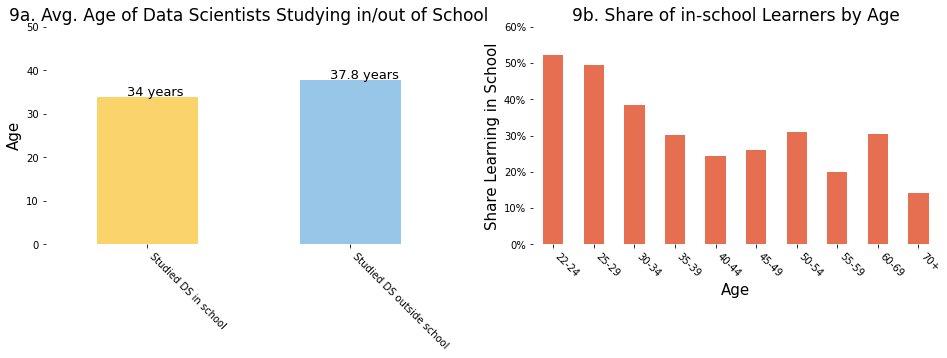

In [20]:
# (viz: source of data science education by age)

# show/hide functionality from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">show/hide my derivation of charts</a>''')
display(tag)

American_DS_inSchool = American_DS[American_DS['Q13_Part_10'] == key1]
American_DS_outSchool = American_DS[American_DS['Q13_Part_10'] != key1]

ages=[]

def avg_age(x):                                      #the same accumulation approach is taken to iterate through each df for 
    age_counter = 0                                  # in vs. out of school learning, returning the average age for each type
    counter = 0
    for row in x.itertuples():
        y = row[2].split("-")
        if len(y) == 2:
            age = ((int(y[0]) + int(y[1])) / 2)
            ages.append(age)
            age_counter += age
            counter += 1
        if len(y) == 1:
            age = int(y[0][:2])
            ages.append(age)
            age_counter += age
            counter += 1
    return (age_counter / counter)
#note that in my calculation of avg. age, I assume those in the 70+ category are exactly 70 years old since I have no other information on them

index = ['Studied DS in school', 'Studied DS outside school']
avg_age = pd.Series([avg_age(American_DS_inSchool), avg_age(American_DS_outSchool)], index=index)


plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,2,1)
avg_age.plot(kind='bar', color = [col_yes, col_no], ylim=(0,50))
ax1.set_xticklabels(index, rotation = -45, ha="left")
plt.box(on=None)
plt.title("9a. Avg. Age of Data Scientists Studying in/out of School", fontsize=17)
ax1.set_ylabel("Age", fontsize=15)

for index, value in enumerate(avg_age):
    ax1.text(index-.1, value+.2, '{0:.3g}'.format(value) + ' years', fontsize=13)  

def calc_share_DS_in_school(x):             #To populate figure 9b, an accumulator for each age range iterates through the df.
    age_counter = 0                         #Here, the total # of rows and the # rows of in-school learners are both collected
    DS_in_school_counter = 0                #and their ratio is returned for each age category
    for row in American_DS.itertuples():
        if row[2] == x:
            age_counter += 1
            if row[45] == 'University Courses (resulting in a university degree)':
                DS_in_school_counter += 1
    #note that below I comment out a print statement printing the values that inform figure 6b for my review.
    #print(x + ": " + str(age_counter) + " observations, " + str(DS_in_school_counter) + " in school")
    return (DS_in_school_counter / age_counter)
    
    
index2 = ['22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
DS_in_school_by_age = pd.Series(list(map(calc_share_DS_in_school, index2)))

American_DS['age'] = ages

ax2 = plt.subplot(1,2,2)
DS_in_school_by_age.plot(kind='bar', color=['#E76F51'], ylim=(0,.6))
ax2.set_xticklabels(index2, rotation = -45, ha="left")
ax2.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%'])#note that the units are overridden manually as percentages
ax2.set_xlabel("Age", fontsize=15)
ax2.set_ylabel("Share Learning in School", fontsize=15)
plt.box(on=None)
plt.title("9b. Share of in-school Learners by Age", fontsize=17);

[//]: # (body discussing figures on age of in/out of school)

<p>
    &emsp;&emsp;&emsp;There's a nearly 4-year age difference between those that studied data science in school versus outside school, which is nearly the entire time data science has been offered in a university setting. Further, consider how <b>the share of learners studying data science in school rises among younger cohorts, even exceeding 50% among the youngest data scientists</b> as seen in Figure 9b. Based on the overall trend exhibited in Figure 9b we can infer that as more and more graduates age into the data scientist work-force this share will continue to steadily increase, meaning that we can expect the majority of new entrants to the data science labor pool to have studied in school moving forward. <b><font size=4>If individuals want to be competitive when just transitioning into the labor pool now, then, they'll want to be in the majority learning data science in school.</b></font>
</p>

[//]: # (Actual educational attainment of data scientists)

<div id="12"></div>
<font color='#088a5a' size=4><b>The Actual Educational Attainment of Data Scientists</b></font>

[//]: # (body discussing the actual educational attainment of data scientists)

<p>
    &emsp;&emsp;&emsp;The second inappropriate assumption in the author's conclusion above is that because most current data scientists didn't get an advanced degree in data science, they don't have an advanced degree. Now this may be putting words in the author's mouth, but I would argue this assumption is made because the author concludes that advanced degrees in general may or may not be worth it if one wants to transition into data science. This assumption is obviously false, and whether or not the author is making this assumption, he's omitting the fact that the overwhelming majority of data scientists do have advanced degrees. <b><font size=4>Of the 782 American data scientists</b></font> in the 2019 Kaggle Survey, <b><font size=4>11 did not complete at least a bachelor's degree,</b></font> and <b><font size=4>81% had advanced degrees,</b></font> as seen in Figures 10a and 10b.
</p>

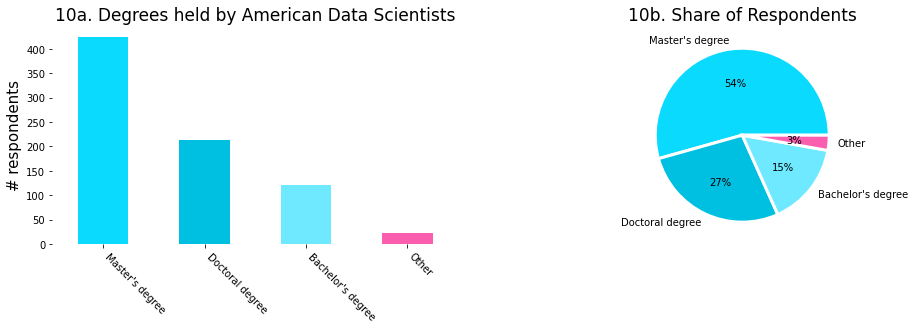

In [21]:
# (viz: educational attainment of data scientists)

# show/hide functionality from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">show/hide my derivation of charts</a>''')
display(tag)

degrees = American_DS['Q4'].value_counts()[:3]                           #in this row the data for the first three categories are ordered automatically
otherdegrees = pd.Series([sum(American_DS['Q4'].value_counts()[3:])])    #the other two categories are summed due to their size
degrees=degrees.append(otherdegrees)                                     #then appended to the first list generated

#This line is used to see the number of respondents not completing at least a bachelor's degree. Note that this number reflects less than the 3% 'other' category in the figure because that also includes those with professional degrees or those that chose not to answer
#print(American_DS['Q4'].value_counts()[3:])

index = ["Master's degree", "Doctoral degree", "Bachelor's degree", "Other"]
colors = ['#0BDAFF', '#00C0E1', '#6EE9FF', '#FC5EAF']

degrees.index = index

plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,2,1)
degrees.plot(kind='bar', color=colors)
ax1.set_xticklabels(index, rotation=-45, ha="left")
plt.box(on=None)
plt.title("10a. Degrees held by American Data Scientists", size=17)
plt.ylabel("# respondents", size=15)


ax2 = plt.subplot(1,2,2)
plt.pie(degrees,
       labels=index,
       autopct="%1.0f%%",
       colors=colors,
       wedgeprops={"linewidth":3,"edgecolor":"white"})
plt.title("10b. Share of Respondents", size=17);

[//]: # (body discussing figures 10a and 10b)

<p>
    &emsp;&emsp;&emsp;This is comparable to <a href="https://www.burtchworks.com/2015/03/02/4-ways-to-spot-a-fake-data-scientist/">similar studies</a> that found that 88% of data scientists have advanced degrees. So one may or may not be able to obtain the same quality of education and experience from the cheaper, more accessible online learning platforms as they could from a full university setting, but the fact is that <b><font size=4>if one doesn't have some sort of advanced degree, they're at best in the bottom 20% of applicants in terms of credentials.</b></font> Further, if we're talking about those that are looking to transition into data science from another discipline, those individuals likely don't have the necessary experience that would justify hiring them over somebody with a masters.
</p>

[//]: # (Educational Credentials as a means of screening candidates, with exceptions)

<div id="13"></div>
<font color='#088a5a' size=4><b>Educational Credentials as a Means of Screening Candidates, with Exceptions</b></font>

[//]: # (body discussing 'Educational Credentials as a means of screening candidates, with exceptions')

<p>
    &emsp;&emsp;&emsp;The simple fact of the matter is that while it leads to otherwise qualified and competent individuals being excluded, <b><font size=4>educational credentials are one of the first indicators employers use to narrow down a pool of applicants</b></font> to a more reasonable level. There is a whole school of thought in education economics called 'screening theory' that seeks to explain this, and it's composed of some of the brightest economists in recent history (including J. Stiglitz, K. Arrow, D. Acemoglu and others). Their theory is that employers viewing an external candidate's application have no way of knowing the candidate' true competence, work-ethic, or ability without dedicating resources to giving them a phone screening, technical interview, or in-person interview. Given the fact that there's costs associated with these screening measures, employers seek ways to minimize the number of applicants that are extended these resources, assuming their screening approach leaves an adequate number of remaining candidates that have a higher likelihood of being successful. This is why at least <a href="https://www.burning-glass.com/wp-content/uploads/The_Quant_Crunch.pdf"><b><font size=4>39% of data scientist postings require advanced degrees.</b></font></a> And if you perform a quick review of the distribution of educational attainment amongst the applicants to data science positions on LinkedIn using LinkedIn Premium, you'll usually find that about 80-90% of candidates have at least a Master's degree. So while there may be cheaper, quicker ways to gain the education and experience necessary to work as a data scientist, having that advanced degree will provide individuals access to the other 39% of all data science postings and help get past the first phase of the hiring process.
</p>

<p>
    &emsp;&emsp;&emsp;It is worth noting however that this justification for obtaining an MS in data science does allow for some exceptions, most notably, those that already have another advanced degree. Given the author's finding that only 27% of current data scientists in the US learned data science in school, it stands to reason that the large majority of advanced degree holders applying to data science jobs do not necessarily have a degree in data science. That being said, <b><font size=4>if an individual has an advanced degree in a related field and can otherwise demonstrate their ability as a data scientist, an MS in data science may not be worth it.</b></font> Further, note that that screening argument focused on the difficulty associated with discerning <i>external candidates'</i> true ability. This does not hold true for internal candidates, whose ability is already well known by the employer. <a href="https://repository.library.northeastern.edu/files/neu:336448/fulltext.pdf">Studies</a> have found that "while educational credentials (are) key 'to getting in the door' at an organization, <i>promotions</i> (tend) to be based on directly observable performance." Thus, <b><font size=4>if a quality employee of an organization that hires data scientists can demonstrate their ability as a data scientist, they're a much more attractive candidate than those whose abilities are unknown.</b></font> For these individuals, devoting the time and money to obtaining an MS in data science may be a worse route than demonstrating their skills on the job. I suspect this describes the 11 data scientists in this survey that have only a Bachelor's degree.
</p>

[//]: # (Conclusions)

<div id="14"></div>
<font color='#088a5a' size=6>4. Conclusions</font><br>

[//]: # (body of conclusions)

<p>
    &emsp;&emsp;&emsp;This analysis was meant to investigate the conditions under which it would or wouldn't be worth it to spend the time and money to earn an advanced degree in data science, and to serve as the first element of my data science portfolio (acknowledging that no data <i>science</i> techniques were used, but rather, data <i>analysis</i>). The author of <a href="https://www.kaggle.com/shivamb/spending-for-ms-in-data-science-worth-it">the Exploratory Data Analysis that this EDA responds to</a> concludes that "if someone wants to earn more, then it is not necessary to have university degree," and "if someone wants to work as a data scientist (fresher or career change)...then it may or may not be worth it." The insights presented in this notebook provide a more nuanced perspective, but at the very least, confirm that it's worth it for somebody with my circumstances.
</p>

<p>
    &emsp;&emsp;&emsp;In <a href="#10">Section 3</a> we saw that for anybody with a bachelor's degree or less formal education looking just to get their foot in the door, it's 100% worth it to pursue an MS in data science because you need one in order to be competitive with the overwhelming majority of data scientists. This isn't necessarily the case for those who already have an analytical foot in the door, though, as these individuals have the opportunity to lend support to data science projects internally and rise to the role of data science that way. It's also likely a better option to build a portfolio of data science projects through lower-cost platforms like Coursera, Udemy, Kaggle etc. for those with advanced degrees in related fields, as well, because since data science is so new, hiring managers don't yet discriminate between the kind of advanced degree so long as the skills are there.
</p>

<p>
    &emsp;&emsp;&emsp;In <a href="#5">Section 2</a> we found that while advanced degrees in data science may be a good way for individuals to get their foot in the door, they're generally not worth the time and money for existing data scientists looking to increase their earnings. Very early in a data scientist's career a Doctoral degree may provide them access to higher paying opportunities, but after their first two years, everybody else's experience will allow them to catch up. Otherwise, it may be even more impressive for an applicant already having a data scientist title to have a bachelor's degree, as data scientists with Bachelor's degrees earn roughly $2,900 per year more than their Master's degree counterparts with the same level of experience. For those individuals just seeking to increase their compensation, an MS in data science would not be worth it. Interestingly those with Professional degrees earn far and away the most money, and since there's not yet any data science equivalent of a PE degree, this serves as an example of how you can dramatically increase earnings when filling roles that require multiple advanced skillsets. This may also point to the value of professional certification programs more broadly as opposed to full-fledged degrees, such as the well respected certifications profered by <a href="https://education.dellemc.com/content/emc/en-us/home/certification-overview.html#vert-click14">Dell</a>, <a href="https://www.coursera.org/professional-certificates/ibm-data-science">IBM</a>, and <a href="https://docs.microsoft.com/en-us/learn/certifications/azure-data-scientist">Microsoft</a>.
</p>

<p>
    &emsp;&emsp;&emsp;Finally, for someone with a Bachelor's degree looking to work their way back into the labor market as a data scientist, I'm now that much more confident that an MS in data science will be worth it for me. I look forward to starting data science courses at Johns Hopkins or otherwise this spring, and to pursuing one of those certifications from there!
</p>

[//]: # (References)

<div id="15"></div>
<font color='#088a5a' size=6>5. References</font><br>

[//]: # (reference list)

1. https://www.kaggle.com/shivamb/spending-for-ms-in-data-science-worth-it/
2. https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/
3. https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm
4. https://searchbusinessanalytics.techtarget.com/feature/Demand-for-data-scientists-is-booming-and-will-increase
5. https://www.bls.gov/careeroutlook/2015/article/should-i-get-a-masters-degree.htm
6. https://www.burtchworks.com/2015/03/02/4-ways-to-spot-a-fake-data-scientist/
7. https://www.burning-glass.com/wp-content/uploads/The_Quant_Crunch.pdf
8. https://repository.library.northeastern.edu/files/neu:336448/fulltext.pdf
9. https://education.dellemc.com/content/emc/en-us/home/certification-overview.html#vert-click14
10. https://www.coursera.org/professional-certificates/ibm-data-science
11. https://docs.microsoft.com/en-us/learn/certifications/azure-data-scientist

In [22]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>